<a href="https://colab.research.google.com/github/khanhc/BTVN_AI_W11_21_04_23/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/Monantruyenthong/Train',target_size=(300,300), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/AI/Monantruyenthong/Test',target_size=(300,300 ), batch_size=32, class_mode='categorical')
training_set.class_indices
test_set.class_indices

Found 80 images belonging to 10 classes.
Found 0 images belonging to 0 classes.


{}

In [ ]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))  
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 20 , batch_size= 512 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác ', test_acc)
print('hàm mất mát a', test_loss)

Epoch 1/20
3/3 [==============================] - 31s 8s/step - loss: 3.2792 - accuracy: 0.3875
Epoch 2/20
3/3 [==============================] - 28s 8s/step - loss: 2.0393 - accuracy: 0.3250
Epoch 3/20
3/3 [==============================] - 29s 9s/step - loss: 1.5697 - accuracy: 0.4625
Epoch 4/20
3/3 [==============================] - 26s 10s/step - loss: 1.5129 - accuracy: 0.4750
Epoch 5/20
3/3 [==============================] - 27s 8s/step - loss: 1.2198 - accuracy: 0.6375
Epoch 6/20
3/3 [==============================] - 28s 8s/step - loss: 0.8939 - accuracy: 0.7125
Epoch 7/20
3/3 [==============================] - 28s 8s/step - loss: 0.6625 - accuracy: 0.7750
Epoch 8/20
3/3 [==============================] - 28s 11s/step - loss: 0.5746 - accuracy: 0.8500
Epoch 9/20
3/3 [==============================] - 28s 8s/step - loss: 0.5321 - accuracy: 0.7875
Epoch 10/20
3/3 [==============================] - 28s 8s/step - loss: 0.3904 - accuracy: 0.8625
Epoch 11/20
3/3 [====================

In [ ]:
#Lưu
from keras.models import load_model
model.save("Nhan_Biet_Mon_An.h5")
model_1=load_model('Nhan_Biet_Mon_An.h5')

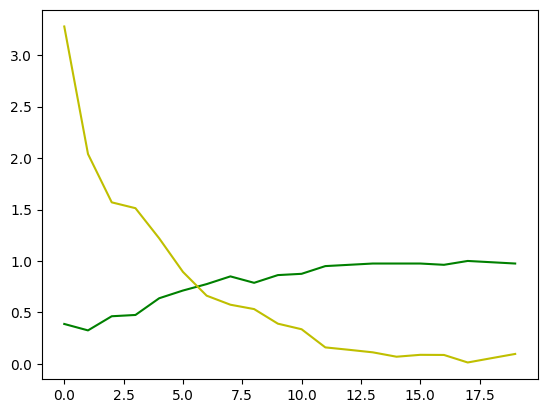

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    # VẼ ĐỒ THỊ ĐỘ MẤT MÁT VÀ CHÍNH XÁC 
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 392ms/step
Bánh bò


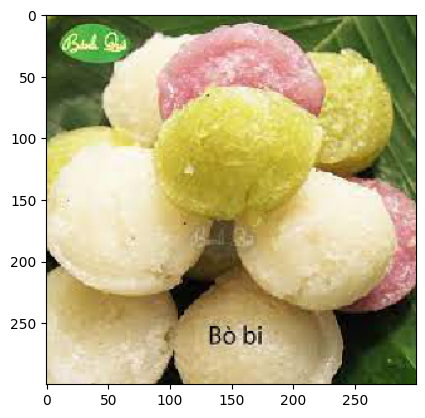

1/1 [==============================] - 0s 106ms/step
Bánh bột lọc


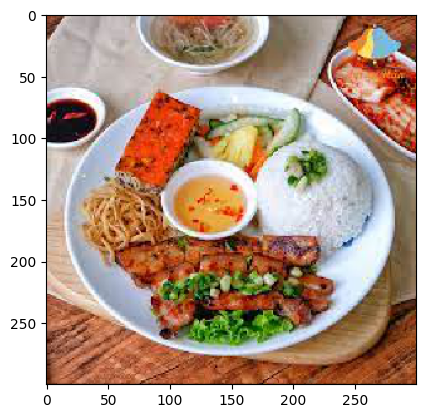

1/1 [==============================] - 0s 159ms/step
Pho


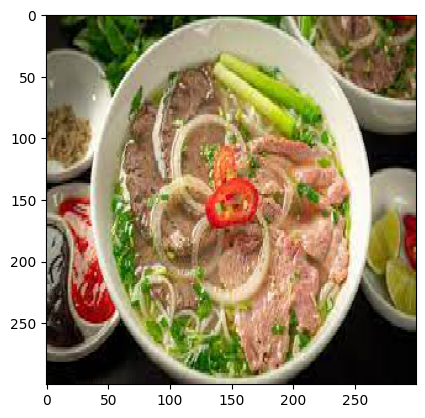

1/1 [==============================] - 0s 133ms/step
Bánh cuốn


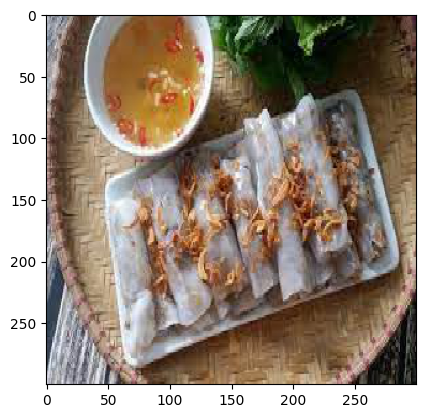

1/1 [==============================] - 0s 105ms/step
Bánh bột lọc


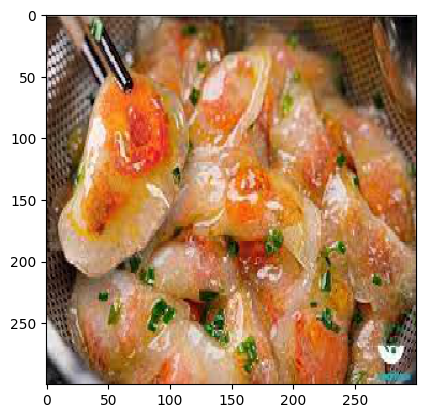

1/1 [==============================] - 0s 126ms/step
Com tam


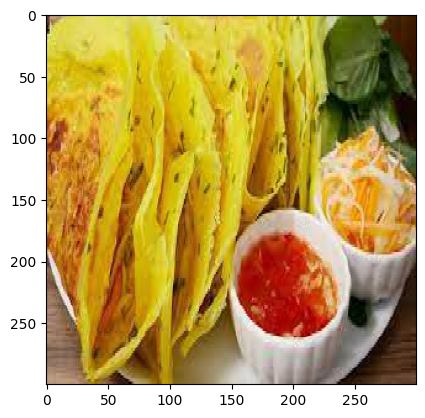

1/1 [==============================] - 0s 106ms/step
Bánh mì


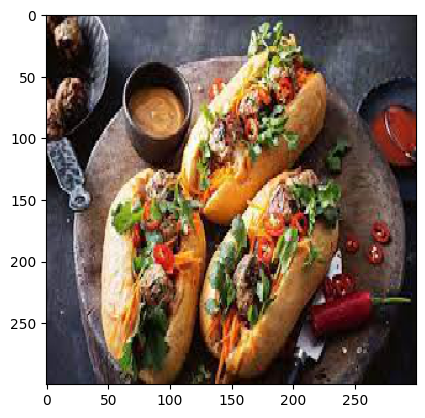

1/1 [==============================] - 0s 118ms/step
Bánh tét


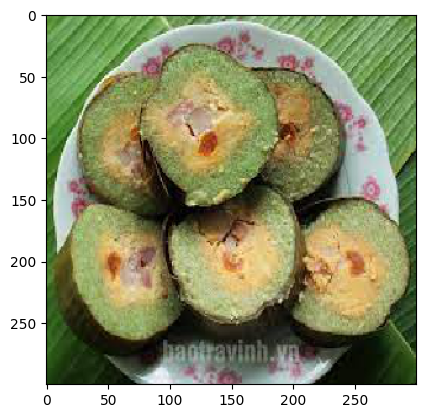

1/1 [==============================] - 0s 192ms/step
Com tam


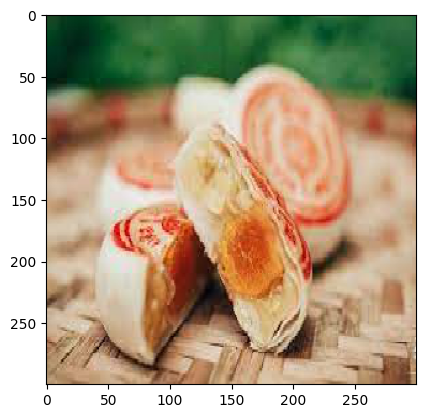

1/1 [==============================] - 0s 190ms/step
Bánh da lợn


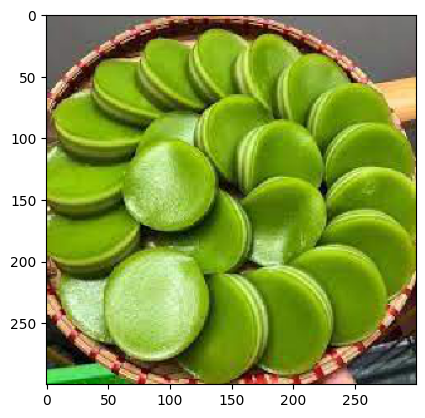

In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/AI/data/test/test1'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Bánh bò','Bánh bột lọc','Bánh cuốn','Bánh da lợn','Bánh mì', 'Bánh tét','Bánh trung thu','Com tam','nem','Pho']
  print(class_name[result]) 
  plt.show()